# Testing Altair-Saver

<a href="https://colab.research.google.com/github/jakevdp/altair_saver/blob/master/AltairSaver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates the installation and use of [altair-viewer](http://github.com/jakevdp/altair_viewer). The following was tested in Colab.



In [0]:
!pip install -q git+https://github.com/jakevdp/altair_saver.git

     |████████████████████████████████| 286kB 7.2MB/s 
     |████████████████████████████████| 911kB 56.1MB/s 


## Setup Selenium + Chromedriver

In [0]:
!apt-get -qq install chromium-chromedriver

Selecting previously unselected package chromium-codecs-ffmpeg-extra.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../chromium-codecs-ffmpeg-extra_79.0.3945.79-0ubuntu0.18.04.1_amd64.deb ...
Unpacking chromium-codecs-ffmpeg-extra (79.0.3945.79-0ubuntu0.18.04.1) ...
Selecting previously unselected package chromium-browser.
Preparing to unpack .../chromium-browser_79.0.3945.79-0ubuntu0.18.04.1_amd64.deb ...
Unpacking chromium-browser (79.0.3945.79-0ubuntu0.18.04.1) ...
Selecting previously unselected package chromium-browser-l10n.
Preparing to unpack .../chromium-browser-l10n_79.0.3945.79-0ubuntu0.18.04.1_all.deb ...
Unpacking chromium-browser-l10n (79.0.3945.79-0ubuntu0.18.04.1) ...
Selecting previously unselected package chromium-chromedriver.
Preparing to unpack .../chromium-chromedriver_79.0.3945.79-0ubuntu0.18.04.1_amd64.deb ...
Unpacking chromium-chromedriver (79.0.3945.79-0ubuntu0.18.04.1) ...
Setting up chromium-codecs-ffmpeg-extra

## Setup npm and the Vega CLI

In [0]:
!npm install --silent vega-lite vega-cli canvas

[canvas] Success: "/content/node_modules/canvas/build/Release/canvas.node" is installed via remote
+ vega-cli@5.9.0
+ canvas@2.6.1
+ vega-lite@4.0.2
added 177 packages from 84 contributors in 9.441s


## Create and save a chart

In [0]:
import altair as alt
from vega_datasets import data
cars = data.cars()

chart = alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

chart.display()

alt.Chart(...)

In [0]:
from altair_saver import save
for fmt in ['json', 'vg.json', 'html', 'png', 'svg', 'pdf']:
  save(chart, f'chart.{fmt}')
!ls -lh chart.*

-rw-r--r-- 1 root root  84K Jan  2 21:51 chart.html
-rw-r--r-- 1 root root 118K Jan  2 21:51 chart.json
-rw-r--r-- 1 root root  15K Jan  2 21:51 chart.pdf
-rw-r--r-- 1 root root  17K Jan  2 21:51 chart.png
-rw-r--r-- 1 root root  11K Jan  2 21:51 chart.svg
-rw-r--r-- 1 root root 128K Jan  2 21:51 chart.vg.json


## View saved charts

Here we use a variety of IPython display mechanisms to load and display the saved charts.

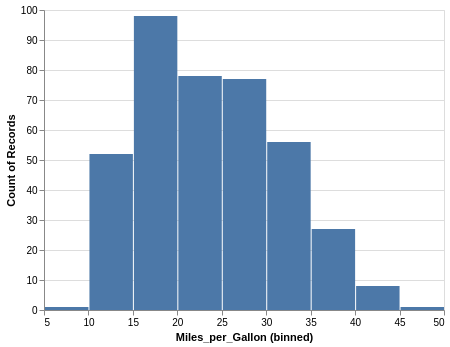

In [0]:
from PIL import Image
Image.open("chart.png")

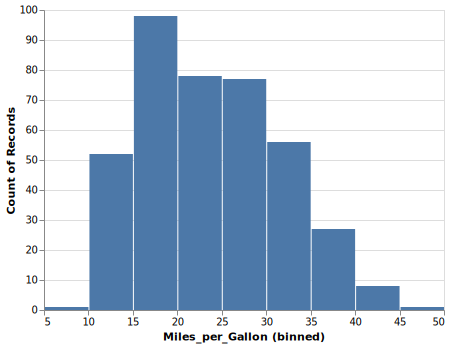

In [0]:
from IPython.display import display, SVG
with open("chart.svg") as f:
  display(SVG(f.read()))

In [0]:
import json

with open('chart.json') as f:
  display(alt.VegaLite(json.load(f)))

In [0]:
import json
from altair import vega
vega.renderers.enable('colab')

with open('chart.vg.json') as f:
  display(vega.Vega(json.load(f)))

In [0]:
from IPython.display import HTML
import base64

with open("chart.pdf", 'rb') as f:
  pdf_base64 = base64.b64encode(f.read()).decode()

HTML(f'Right-click and choose "Open In New Tab": <a download="chart.pdf" href="data:application/pdf;base64,{pdf_base64}">chart.pdf</a>')